In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy
from sklearn.feature_selection import SelectKBest,f_classif

In [9]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
iris = fetch_ucirepo(id=53) #iris
handwritten_digits = fetch_ucirepo(id=80) 
spambase = fetch_ucirepo(id=94) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

print(iris)

# df = cdc_diabetes_health_indicators
# # data (as pandas dataframes) 
# X = df.data.features 
# y = df.data.targets 
  
# # # metadata 
# print(df.metadata) 
  
# # variable information 
# print(df.variables) 

KeyboardInterrupt: 

In [7]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "train_u6lujuX_CVtuZ9i (1).csv"

# Load the latest version
loan = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ninzaami/loan-predication",
  file_path
)

## Loan Dataset

In [7]:
print(loan.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [28]:
print(len(loan[loan["Loan_Status"]=="Y"]))
print(len(loan[loan["Loan_Status"]=="N"]))
loan.info()

422
192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


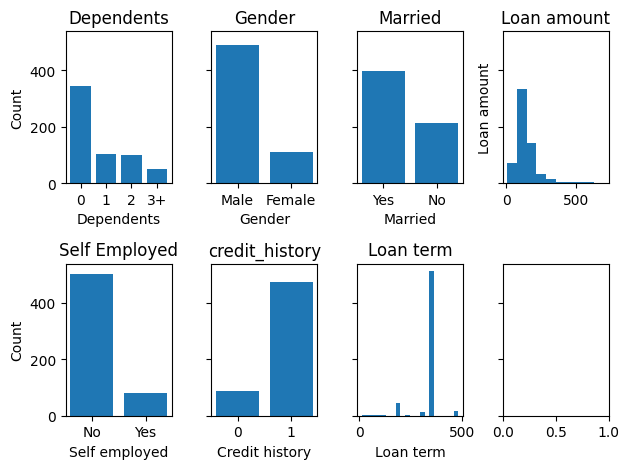

In [30]:

# loan["Dependents"].fillna("0",inplace=True)

dependents = loan["Dependents"].value_counts()
gender = loan["Gender"].value_counts()
married = loan["Married"].value_counts()
self_employed = loan["Self_Employed"].value_counts()
credit_history = loan["Credit_History"].value_counts()
loan_term = loan["Loan_Amount_Term"].value_counts()

fig,ax = plt.subplots(2,4,sharey=True)
ax[0,0].set_title("Dependents")
ax[0,0].bar(dependents.index, dependents.values)
ax[0,0].set_ylabel("Count")
ax[0,0].set_xlabel("Dependents")

ax[0,1].set_title("Gender")
ax[0,1].bar(gender.index,gender.values)
ax[0,1].set_xlabel("Gender")

ax[0,2].set_title("Married")
ax[0,2].bar(married.index,married.values)
ax[0,2].set_xlabel("Married")

ax[0,3].set_title("Loan amount")
ax[0,3].hist(loan["LoanAmount"])
ax[0,3].set_ylabel("Loan amount")

ax[1,0].set_title("Self Employed")
ax[1,0].set_ylabel("Count")
ax[1,0].set_xlabel("Self employed")
ax[1,0].bar(self_employed.index, self_employed.values)

ax[1,1].set_title("credit_history")
ax[1,1].set_xlabel("Credit history")
ax[1,1].bar(credit_history.index,credit_history.values)

ax[1,2].set_title("Loan term")
ax[1,2].set_xlabel("Loan term")
# ax[1,2].bar(loan_term.index,loan_term.values)
ax[1,2].hist(loan["Loan_Amount_Term"], bins=20)

plt.tight_layout()
plt.show()

<Axes: >

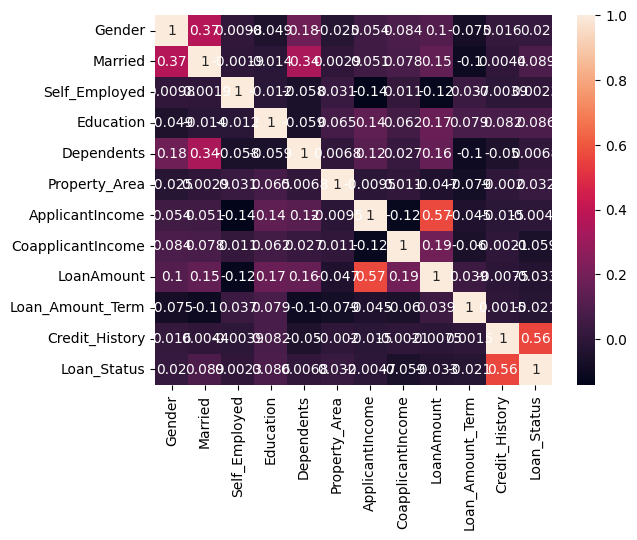

In [ ]:

loan["Gender"] = loan["Gender"].map({"Male": 1, "Female": 0})
loan["Married"] = loan["Married"].map({"Yes": 1, "No": 0})
loan["Self_Employed"] = loan["Self_Employed"].map({"Yes": 0, "No": 1})
loan["Education"] = loan["Education"].map({"Graduate": 1, "Not Graduate": 0})
loan["Dependents"] = loan["Dependents"].map({"0": 0, "1": 1, "2": 2, "3+": 3})
loan["Property_Area"] = loan["Property_Area"].map({"Urban": 2, "Semiurban": 1, "Rural": 0})
loan["Loan_Status"] = loan["Loan_Status"].map({"Y": 1, "N": 0})


loan = loan[["Gender", "Married", "Self_Employed", "Education", "Dependents", "Property_Area","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History", "Loan_Status"]]

sns.heatmap(loan.corr(),annot=True)

In [32]:
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode())
loan["Gender"] = loan["Gender"].fillna(loan["Gender"].mode())
loan["Married"] = loan["Married"].fillna(loan["Married"].mode())
loan["Self_Employed"] = loan["Self_Employed"].fillna(loan["Self_Employed"].mode())
loan["Credit_History"] = loan["Credit_History"].fillna(loan["Credit_History"].mode())
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode())
loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].median())

In [27]:


X = loan.drop('Loan_Status', axis=1)

X.fillna(X.median(), inplace=True)
y = loan['Loan_Status']


selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)

scores = {k:(fit.scores_[k],fit.pvalues_[k]) for k in X.columns}
#     'Feature': X.columns,
#     'F_Score': fit.scores_,
#     'P_Value': fit.pvalues_
# }

# print(scores.sort_values(by='F_Score', ascending=False))
print(scores)


NameError: name 'loan' is not defined

## Iris

In [3]:
iris = pd.read_csv(r"./datasets/dataset1_Iris.csv")
print(iris.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [16]:
virginica = iris[iris["Species"]=="Iris-virginica"]
setosa = iris[iris["Species"]=="Iris-setosa"]
versicolor = iris[iris["Species"]=="Iris-versicolor"]



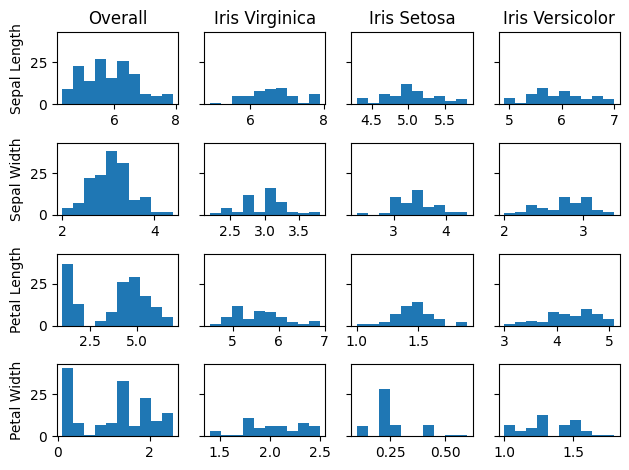

In [20]:
fig,ax = plt.subplots(nrows=4,ncols=4,sharey=True)
attr = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

title = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]


for i in range(4):
    ax[i,0].hist(iris[attr[i]])
    ax[i,0].set_ylabel(title[i])
    
    ax[i,1].hist(virginica[attr[i]])

    ax[i,2].hist(setosa[attr[i]])

    ax[i,3].hist(versicolor[attr[i]])
    if i!=0:
        continue
    ax[i,0].set_title("Overall")
    ax[i,2].set_title("Iris Setosa")
    ax[i,1].set_title("Iris Virginica")
    ax[i,3].set_title("Iris Versicolor")

plt.tight_layout()
plt.show()


In [21]:
iris["Species"].tail()

iris["Species"] = iris["Species"].map({"Iris-setosa":0, "Iris-versicolor": 1, "Iris-virginica": 2})

<Axes: >

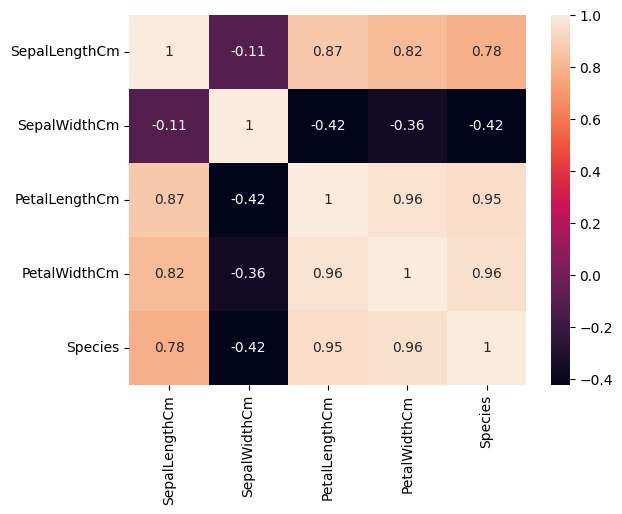

In [24]:
sns.heatmap(iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm","Species"]].corr(), annot=True)

In [ ]:
X = iris.drop(["Species","Id"], axis=1)
y = iris["Species"]



selector = SelectKBest(score_func=f_classif,k="all")
fit = selector.fit(X,y)
scores = {X.columns[k]:(fit.scores_[k],fit.pvalues_[k]) for k in range(len(X.columns))}

print(sorted(scores,key=lambda x: scores[x][1]))

print(scores)

['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm']
{'SepalLengthCm': (np.float64(119.26450218449871), np.float64(1.6696691907731823e-31)), 'SepalWidthCm': (np.float64(47.364461402993975), np.float64(1.3279165184570802e-16)), 'PetalLengthCm': (np.float64(1179.0343277002278), np.float64(3.0519758018263386e-91)), 'PetalWidthCm': (np.float64(959.3244057257541), np.float64(4.376956957491196e-85))}
